# IRIS - Connection I

![Concatenate Layer](https://github.com/DrKAI/image/blob/main/Concatenate%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [ ]:
iris = load_iris()

x = iris.data
y = iris.target

In [ ]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [2]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.1, random_state=2022)

In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((135, 4), (135,), (15, 4), (15,))

## **length끼리, width끼리**

In [ ]:
print(df_x.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [ ]:
tr_x_l = train_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ] # Length
tr_x_w = train_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ] # Width

In [ ]:
tr_x_l.shape, tr_x_w.shape

((135, 2), (135, 2))

In [ ]:
te_x_l = test_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
te_x_w = test_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

## One-hot Encoding

In [12]:
from tensorflow.keras.utils import to_categorical

In [ ]:
train_y = to_categorical(train_y, 3)
test_y = to_categorical(test_y, 3)

In [ ]:
train_y.shape

(135, 3)

In [ ]:
tr_x_l.shape, tr_x_w.shape

((135, 2), (135, 2))

## Modeling : multi-input & Concatenate layer

- Functional API

In [ ]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [ ]:
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기 : input 2개!
il_l = Input( shape=(2,) )
hl_l = Dense(2, activation=relu)(il_l)

il_w = Input( shape=(2,) )
hl_w = Dense(2, activation=relu)(il_w)

cl = Concatenate()([hl_l, hl_w]) # 레이어 합치기
ol = Dense(3, activation=softmax)(cl)

# 3. 모델 시작과 끝 지정
model = Model([il_l, il_w], ol) # input layer를 list로 묶어서 전달

# 4. 모델 컴파일
model.compile(loss=categorical_crossentropy, metrics=['accuracy'], optimizer=Adam())

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 2)            6           ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 2)            6           ['input_2[0][0]']                
                                                                                              

## 모델 시각화

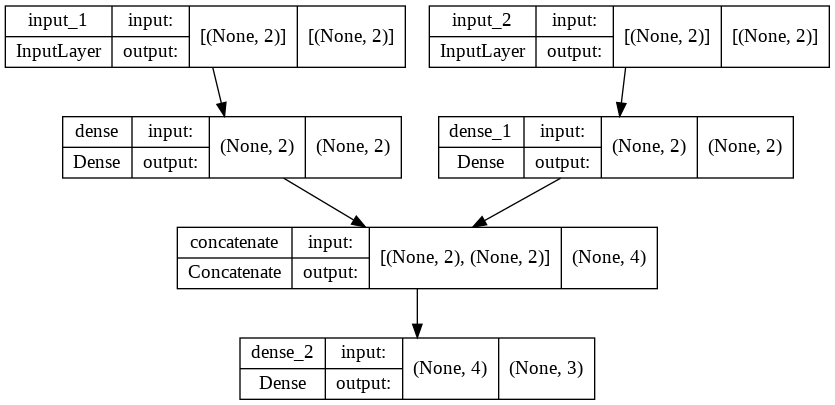

In [ ]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [ ]:
model.fit([tr_x_l, tr_x_w], train_y, validation_split=0.1, # input data 추가할 때 모델링 할 때와 같은 규칙으로 진행해야함함
          epochs=1000, verbose=1, callbacks=[es])

---

# IRIS - Connection I practice

- 위의 코드를 **그대로** 따라서 코드 작성하기!

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [3]:
iris = load_iris()

x = iris.data
y = iris.target

In [4]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=.1)

## **length끼리, width끼리**

In [8]:
print(df_x.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [11]:
x_train_l = x_train.loc[:, ['sepal length (cm)', 'petal length (cm)']]
x_train_w = x_train.loc[:, ['sepal width (cm)', 'petal width (cm)']]

In [13]:
x_test_l = x_test.loc[:, ['sepal length (cm)', 'petal length (cm)']]
x_test_w = x_test.loc[:, ['sepal width (cm)', 'petal width (cm)']]

In [17]:
x_train_l.shape, x_train_w.shape

((135, 2), (135, 2))

## One-hot Encoding

In [15]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

## Modeling : multi-input & Concatenate layer

In [16]:
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [20]:
keras.backend.clear_session()

length = Input(shape=(2, ))
x1 = Dense(64, activation='relu')(length)

width = Input(shape=(2, ))
x2 = Dense(64, activation='relu')(width)

x = Concatenate()([x1, x2])
outputs = Dense(3, activation='softmax')(x)

model = keras.models.Model([length, width], outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           192         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           192         ['input_2[0][0]']                
                                                                                              

## 모델 시각화

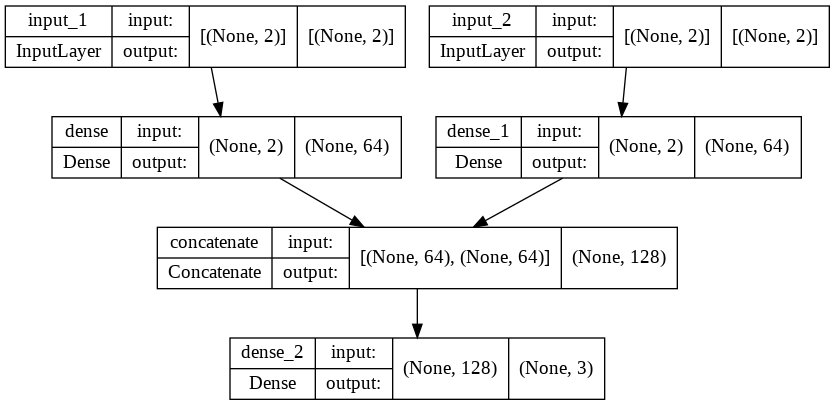

In [21]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [22]:
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, restore_best_weights=True)

In [23]:
model.fit([x_train_l, x_train_w], y_train, epochs=100, callbacks=[es], validation_data=([x_test_l, x_test_w], y_test))

Epoch 1/100
5/5 [==============================] - 1s 64ms/step - loss: 1.2734 - accuracy: 0.3111 - val_loss: 1.0581 - val_accuracy: 0.5333
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 1.1031 - accuracy: 0.4000 - val_loss: 1.0652 - val_accuracy: 0.6000
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 1.0341 - accuracy: 0.6519 - val_loss: 1.0777 - val_accuracy: 0.4000
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 0.9997 - accuracy: 0.4667 - val_loss: 1.0504 - val_accuracy: 0.3333
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 0.9613 - accuracy: 0.5556 - val_loss: 0.9500 - val_accuracy: 0.6000
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 0.9211 - accuracy: 0.5852 - val_loss: 0.8715 - val_accuracy: 0.8000
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 0.8844 - accuracy: 0.6296 - val_loss: 0.8034 - val_accuracy: 0.8000
Epoch 8/100
5/5 [========